In [ ]:
# Ref Big Dataset: https://www.kaggle.com/moltean/fruits

In [1]:
import tensorflow as tf

In [2]:
from glob import glob

In [8]:
from google.colab import files
uploaded = files.upload()


Saving fruits-small.zip to fruits-small (1).zip


In [9]:
import zipfile

zip_path = "/content/fruits-small.zip"  # Replace with the correct path to the ZIP file
destination_path = "/content/fruits-small"  # Replace with the desired destination path

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)

print("Extraction completed.")


Extraction completed.


In [55]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
# Set the training path and validation path

train_path = 'fruits-small/fruits-small/data/Training/'
validation_path = 'fruits-small/fruits-small/data/Validation/'

In [61]:
import matplotlib.image as mpimg

# Set the training path
train_path = 'fruits-small/fruits-small/data/Training/'

# Get the list of all image files in the training directory
image_files = [file for file in os.listdir(train_path) if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png')]

# Plot all the images
fig = plt.figure(figsize=(12, 8))

for i, image_file in enumerate(image_files):
    img = mpimg.imread(os.path.join(train_path, image_file))
    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()



<Figure size 1200x800 with 0 Axes>

In [63]:
# VGG16
# Step 1: Create ImageGenerator object (Use Algo's preprocessing function)
gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

# Step 2: Create Train and Valid Obj
train_generator = gen.flow_from_directory(train_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=32)

valid_generator = gen.flow_from_directory(validation_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=32)

# Step 3: Load the model with Training Enabled!
vgg = tf.keras.applications.vgg16.VGG16(input_shape=[224,224,3],
                                        weights="imagenet",
                                        include_top=False)

# Since I am following Approach 2 (Check Whiteboard Notes :) ), I will lock weights of CNN layer and remove the ANN
for layer in vgg.layers:
    layer.trainable = False  # If Approach 1 --- True else False

# Step 4: Create FC layer
flatten = tf.keras.layers.Flatten()

# Create your hidden layers here
hidden_layer1 = tf.keras.layers.Dense(512, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(256, activation='relu')

# Output layer
output_layer = tf.keras.layers.Dense(7, activation='softmax')

# Add the layers to the model
x = flatten(vgg.output)
x = hidden_layer1(x)
x = hidden_layer2(x)
predictions = output_layer(x)

# Create the final model
model = tf.keras.Model(inputs=vgg.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(valid_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 3425 images belonging to 7 classes.
Found 1150 images belonging to 7 classes.
Epoch 1/10
108/108 [==============================] - 62s 558ms/step - loss: 1.7052 - accuracy: 0.9609 - val_loss: 0.2072 - val_accuracy: 0.9913
Epoch 2/10
108/108 [==============================] - 57s 526ms/step - loss: 0.1302 - accuracy: 0.9959 - val_loss: 0.6535 - val_accuracy: 0.9800
Epoch 3/10
108/108 [==============================] - 58s 533ms/step - loss: 0.0644 - accuracy: 0.9985 - val_loss: 0.1051 - val_accuracy: 0.9983
Epoch 4/10
108/108 [==============================] - 63s 581ms/step - loss: 0.1594 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
108/108 [==============================] - 57s 527ms/step - loss: 0.1572 - accuracy: 0.9977 - val_loss: 5.1830e-10 - val_accuracy: 1.0000
Epoch 6/10
108/108 [==============================] - 57s 528ms/step - loss: 0.0313 - accuracy: 0.9991 - val_loss: 0.1015 - val_accuracy: 0.9965
Epoch 7/10
108/108 [==================

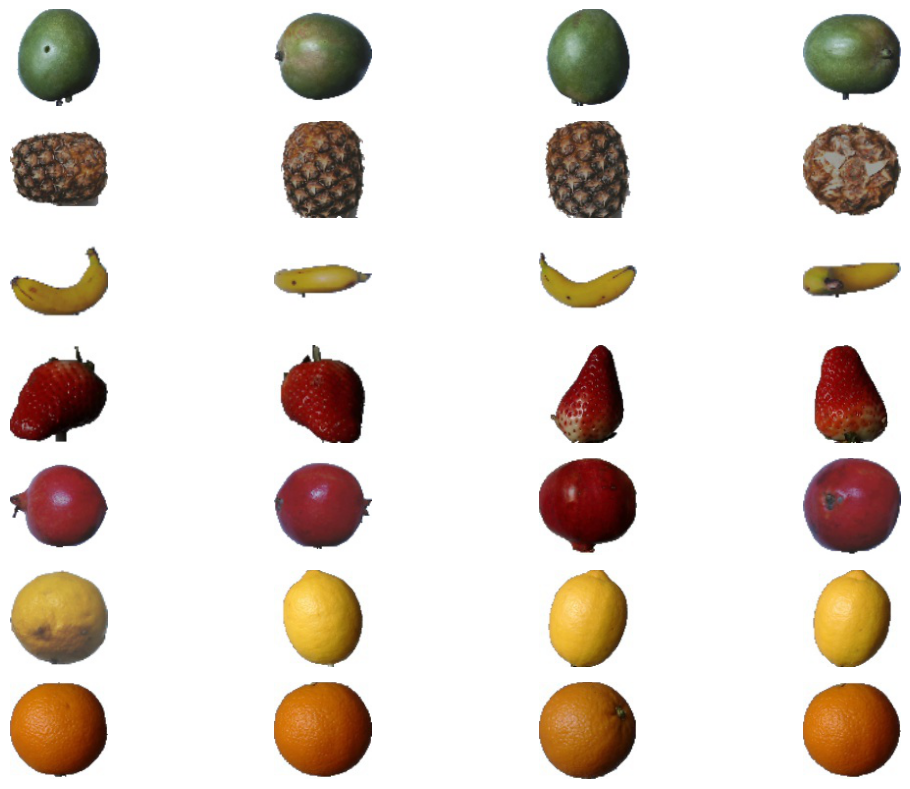

In [69]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the training path
train_path = 'fruits-small/fruits-small/data/Training/'

# Get the list of class directories in the training path
class_directories = os.listdir(train_path)

# Choose random class directories
random_classes = random.sample(class_directories, k=7)

# Plot images from each randomly selected class directory
fig, axs = plt.subplots(nrows=len(random_classes), ncols=4, figsize=(12, 8))

for i, class_dir in enumerate(random_classes):
    class_path = os.path.join(train_path, class_dir)
    image_files = os.listdir(class_path)
    random_images = random.sample(image_files, k=4)

    for j, image_file in enumerate(random_images):
        img_path = os.path.join(class_path, image_file)
        img = mpimg.imread(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()


In [74]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(valid_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save the model
model.save("fruits_model.h5")
print("Model saved.")

Epoch 1/10
108/108 [==============================] - 60s 561ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
108/108 [==============================] - 64s 594ms/step - loss: 0.0815 - accuracy: 0.9994 - val_loss: 1.1301e-04 - val_accuracy: 1.0000
Epoch 3/10
108/108 [==============================] - 57s 526ms/step - loss: 0.2042 - accuracy: 0.9991 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
108/108 [==============================] - 62s 572ms/step - loss: 0.0957 - accuracy: 0.9988 - val_loss: 0.3472 - val_accuracy: 0.9957
Epoch 5/10
108/108 [==============================] - 60s 552ms/step - loss: 0.2110 - accuracy: 0.9980 - val_loss: 0.0294 - val_accuracy: 0.9991
Epoch 6/10
108/108 [==============================] - 56s 522ms/step - loss: 0.2505 - accuracy: 0.9977 - val_loss: 0.0773 - val_accuracy: 0.9991
Epoch 7/10
108/108 [==============================] - 58s 538ms/step - loss: 0.1272 - accuracy: 0.9994 - val_loss:

In [75]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [76]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [77]:
#Compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
#Callbacks

# How to stop the training process if my model has converged successfully?
#
# Prashant Nair's Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
#
#
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl

  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']

    if testScore > trainScore and testScore >= self.cl:
      self.model.stop_training=True

In [79]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(train_generator)
test_loss, test_accuracy = model.evaluate(valid_generator)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Define the desired confidence level (CL)
CL = 0.9

# Check if the model meets the desired criteria
if test_accuracy >= train_accuracy and test_accuracy >= CL:
    print("Model is generalized.")

    # Save the model
    model.save("fruits_model.h5")
    print("Model saved.")
else:
    print("Model does not meet the desired criteria.")

Epoch 1/10
108/108 [==============================] - 61s 555ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1806 - val_accuracy: 0.9983
Epoch 2/10
108/108 [==============================] - 62s 580ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy: 0.9983
Epoch 3/10
108/108 [==============================] - 63s 580ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2041 - val_accuracy: 0.9983
Epoch 4/10
108/108 [==============================] - 60s 552ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2624 - val_accuracy: 0.9965
Epoch 5/10
108/108 [==============================] - 61s 567ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.1464e-10 - val_accuracy: 1.0000
Epoch 6/10
108/108 [==============================] - 56s 524ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9983
Epoch 7/10
108/108 [==============================] - 58s 535ms/step - loss: 0.0000e+00 - accuracy: 1.